In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0

In [3]:
#lets describe the data
df.describe()

Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2000.000000  2000.000000    2000.000000    2000.000000  2000.000000   
mean      3.703500   121.182500      69.145500      20.935000    80.254000   
std       3.306063    32.068636      19.188315      16.103243   111.180534   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      63.500000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    40.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   744.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  2000.000000               2000.000000  2000.000000  2000.000000  
mean     32.193000                  0.470930    33.090500     0.342000  
std       8.149901                  0.323553    11.786423     0.474498  
min       0.000000                  0.078000    21.000000     0.000000  
25%      27.375000                  0.244000    24.000000     0.000000  
50%      32.300000                  0.376000    29.000000     0.000000  
75%      36.800000                  0.624000    40.000000     1.000000  
max      80.600000                  2.420000    81.000000     1.000000

In [5]:
#infromation of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [6]:
#any null values 
#not neccessary in above information we can see
df.isnull().values.any()

False

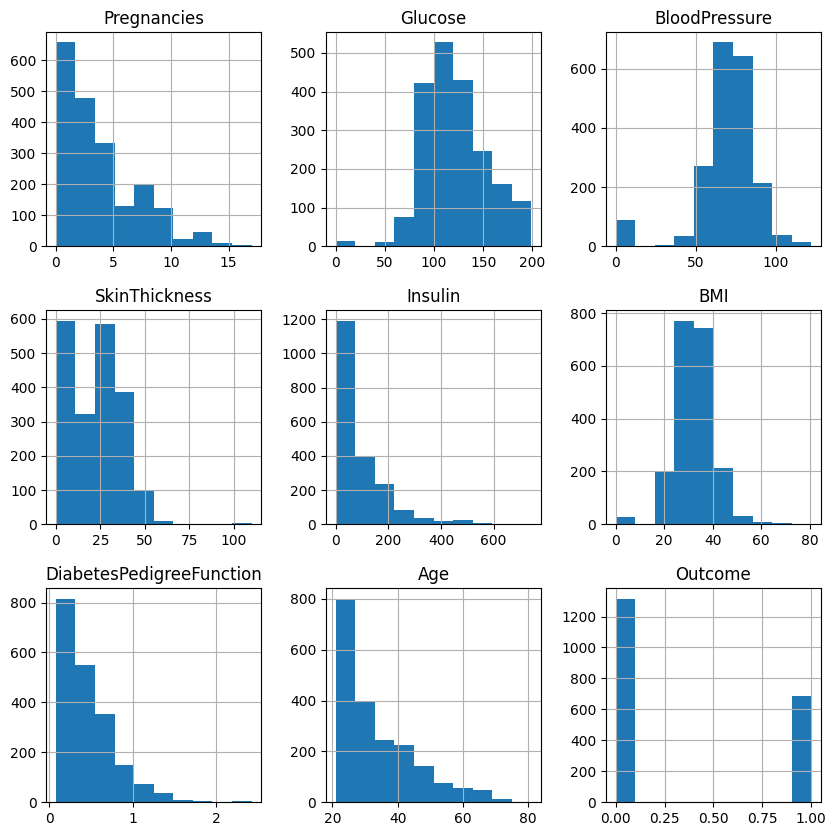

In [7]:
#histogram
df.hist(bins=10,figsize=(10,10))
plt.show()

<Axes: >

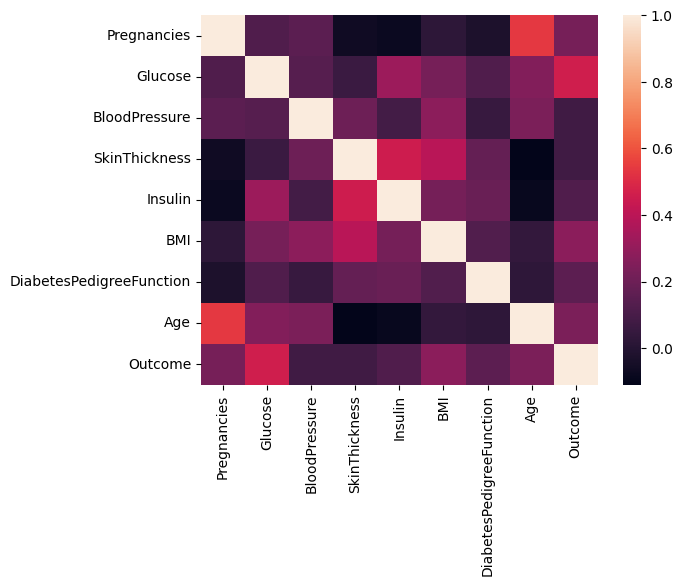

In [8]:
#correlation

sns.heatmap(df.corr())
# we can see skin thickness,insulin,pregnencies and age are full independent to each other
#age and pregencies has negative correlation

C:\Users\HP\AppData\Local\Temp\ipykernel_9968\2219555376.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Outcome'],palette='Set1')


<Axes: xlabel='count', ylabel='Outcome'>

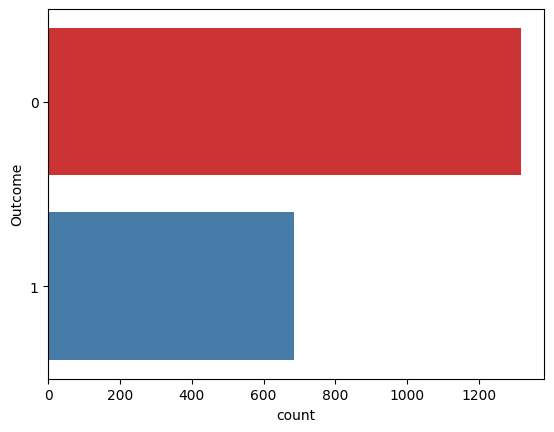

In [9]:
#lets count total outcome in each target 0 1
#0 means no diabeted
#1 means patient with diabtes
sns.countplot(y=df['Outcome'],palette='Set1')

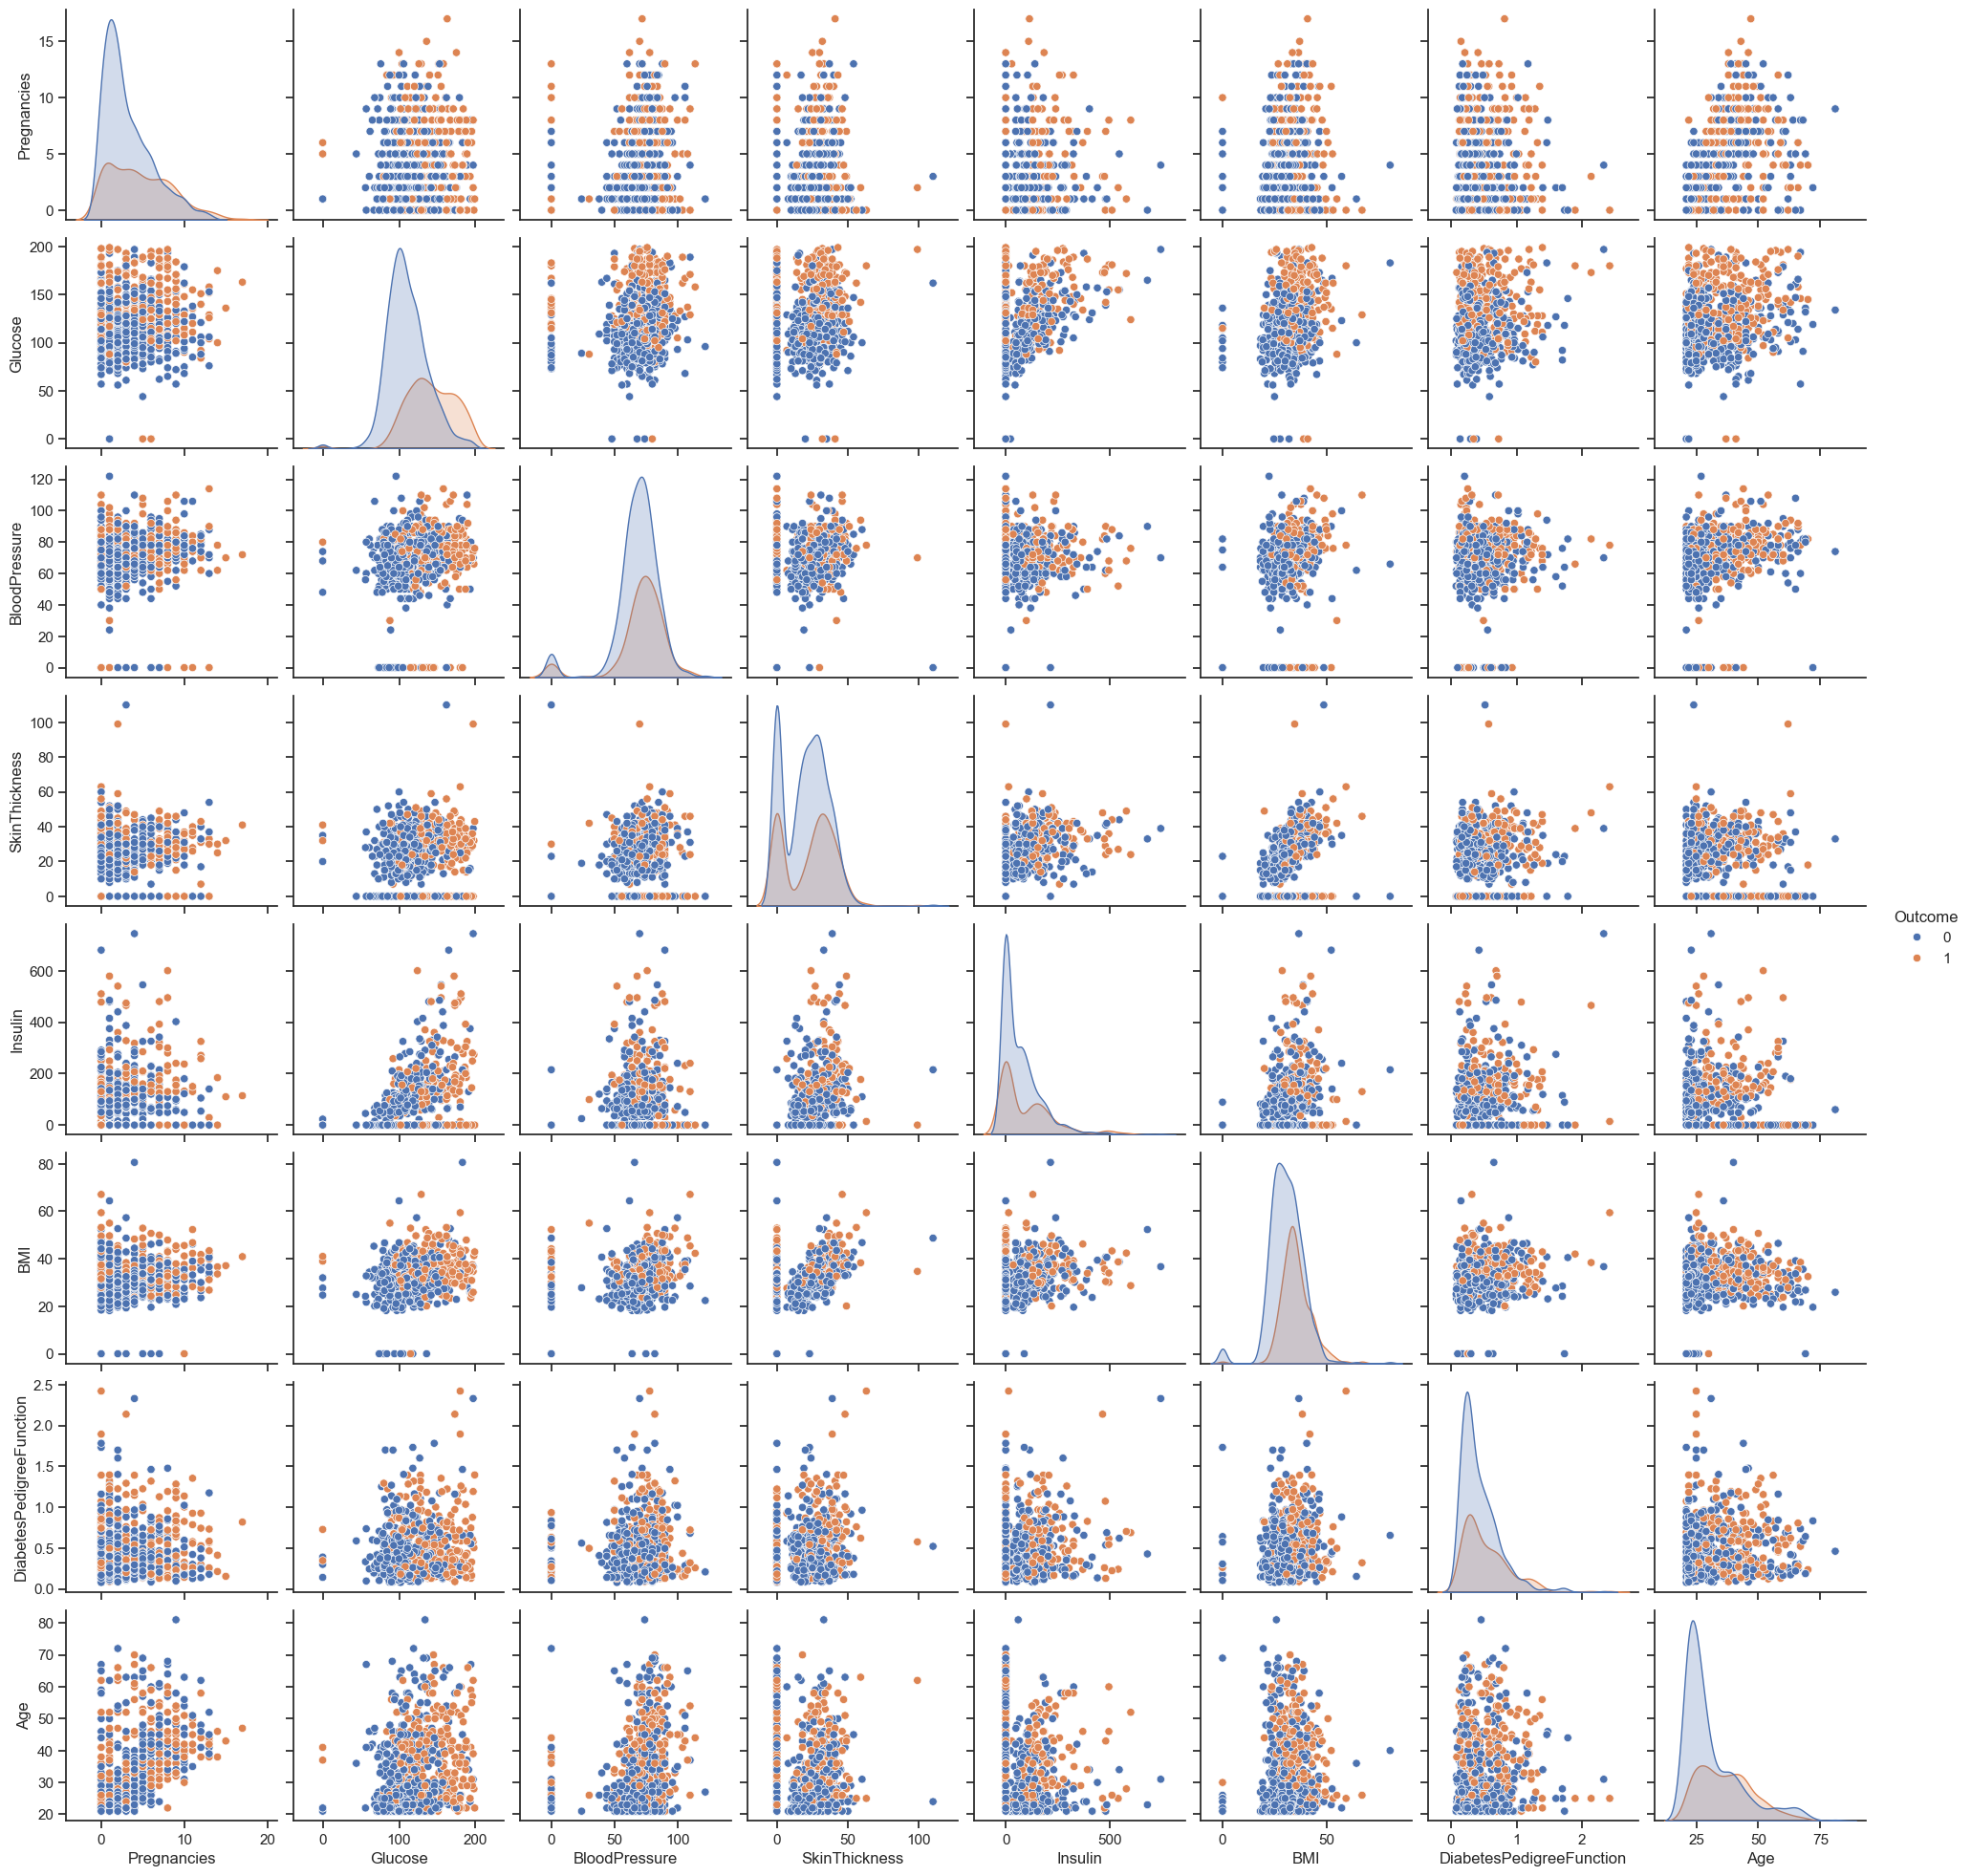

In [16]:
sns.set(style="ticks")
sns.pairplot(df, hue="Outcome")

<Axes: >

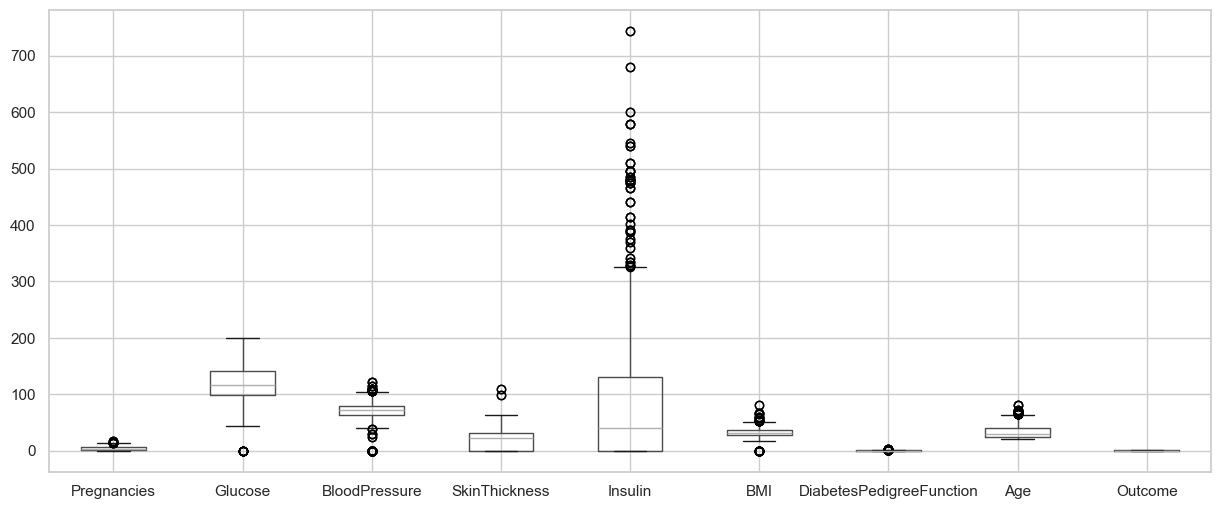

In [20]:
#box plot for outlier visualization
sns.set(style="whitegrid")
df.boxplot(figsize=(15,6))

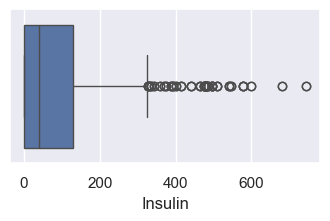

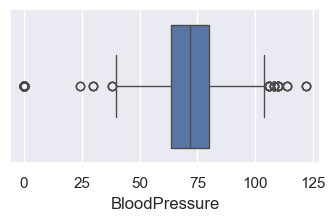

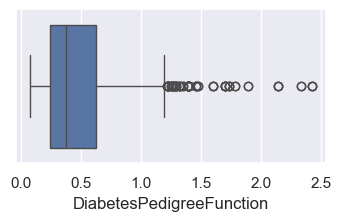

In [14]:
#box plot
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=df['Insulin'])
plt.show()
sns.boxplot(x=df['BloodPressure'])
plt.show()
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.show()

In [21]:
#outlier remove

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)

#print((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR)))


---Q1--- 
 Pregnancies                  1.000
Glucose                     99.000
BloodPressure               63.500
SkinThickness                0.000
Insulin                      0.000
BMI                         27.375
DiabetesPedigreeFunction     0.244
Age                         24.000
Outcome                      0.000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.000
Glucose                     141.000
BloodPressure                80.000
SkinThickness                32.000
Insulin                     130.000
BMI                          36.800
DiabetesPedigreeFunction      0.624
Age                          40.000
Outcome                       1.000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                   5.000
Glucose                      42.000
BloodPressure                16.500
SkinThickness                32.000
Insulin                     130.000
BMI                           9.425
DiabetesPedigreeFunction      0.380
Age                 

In [22]:
#outlier remove
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,df_out.shape
#more than 80 records deleted

((2000, 9), (1652, 9))

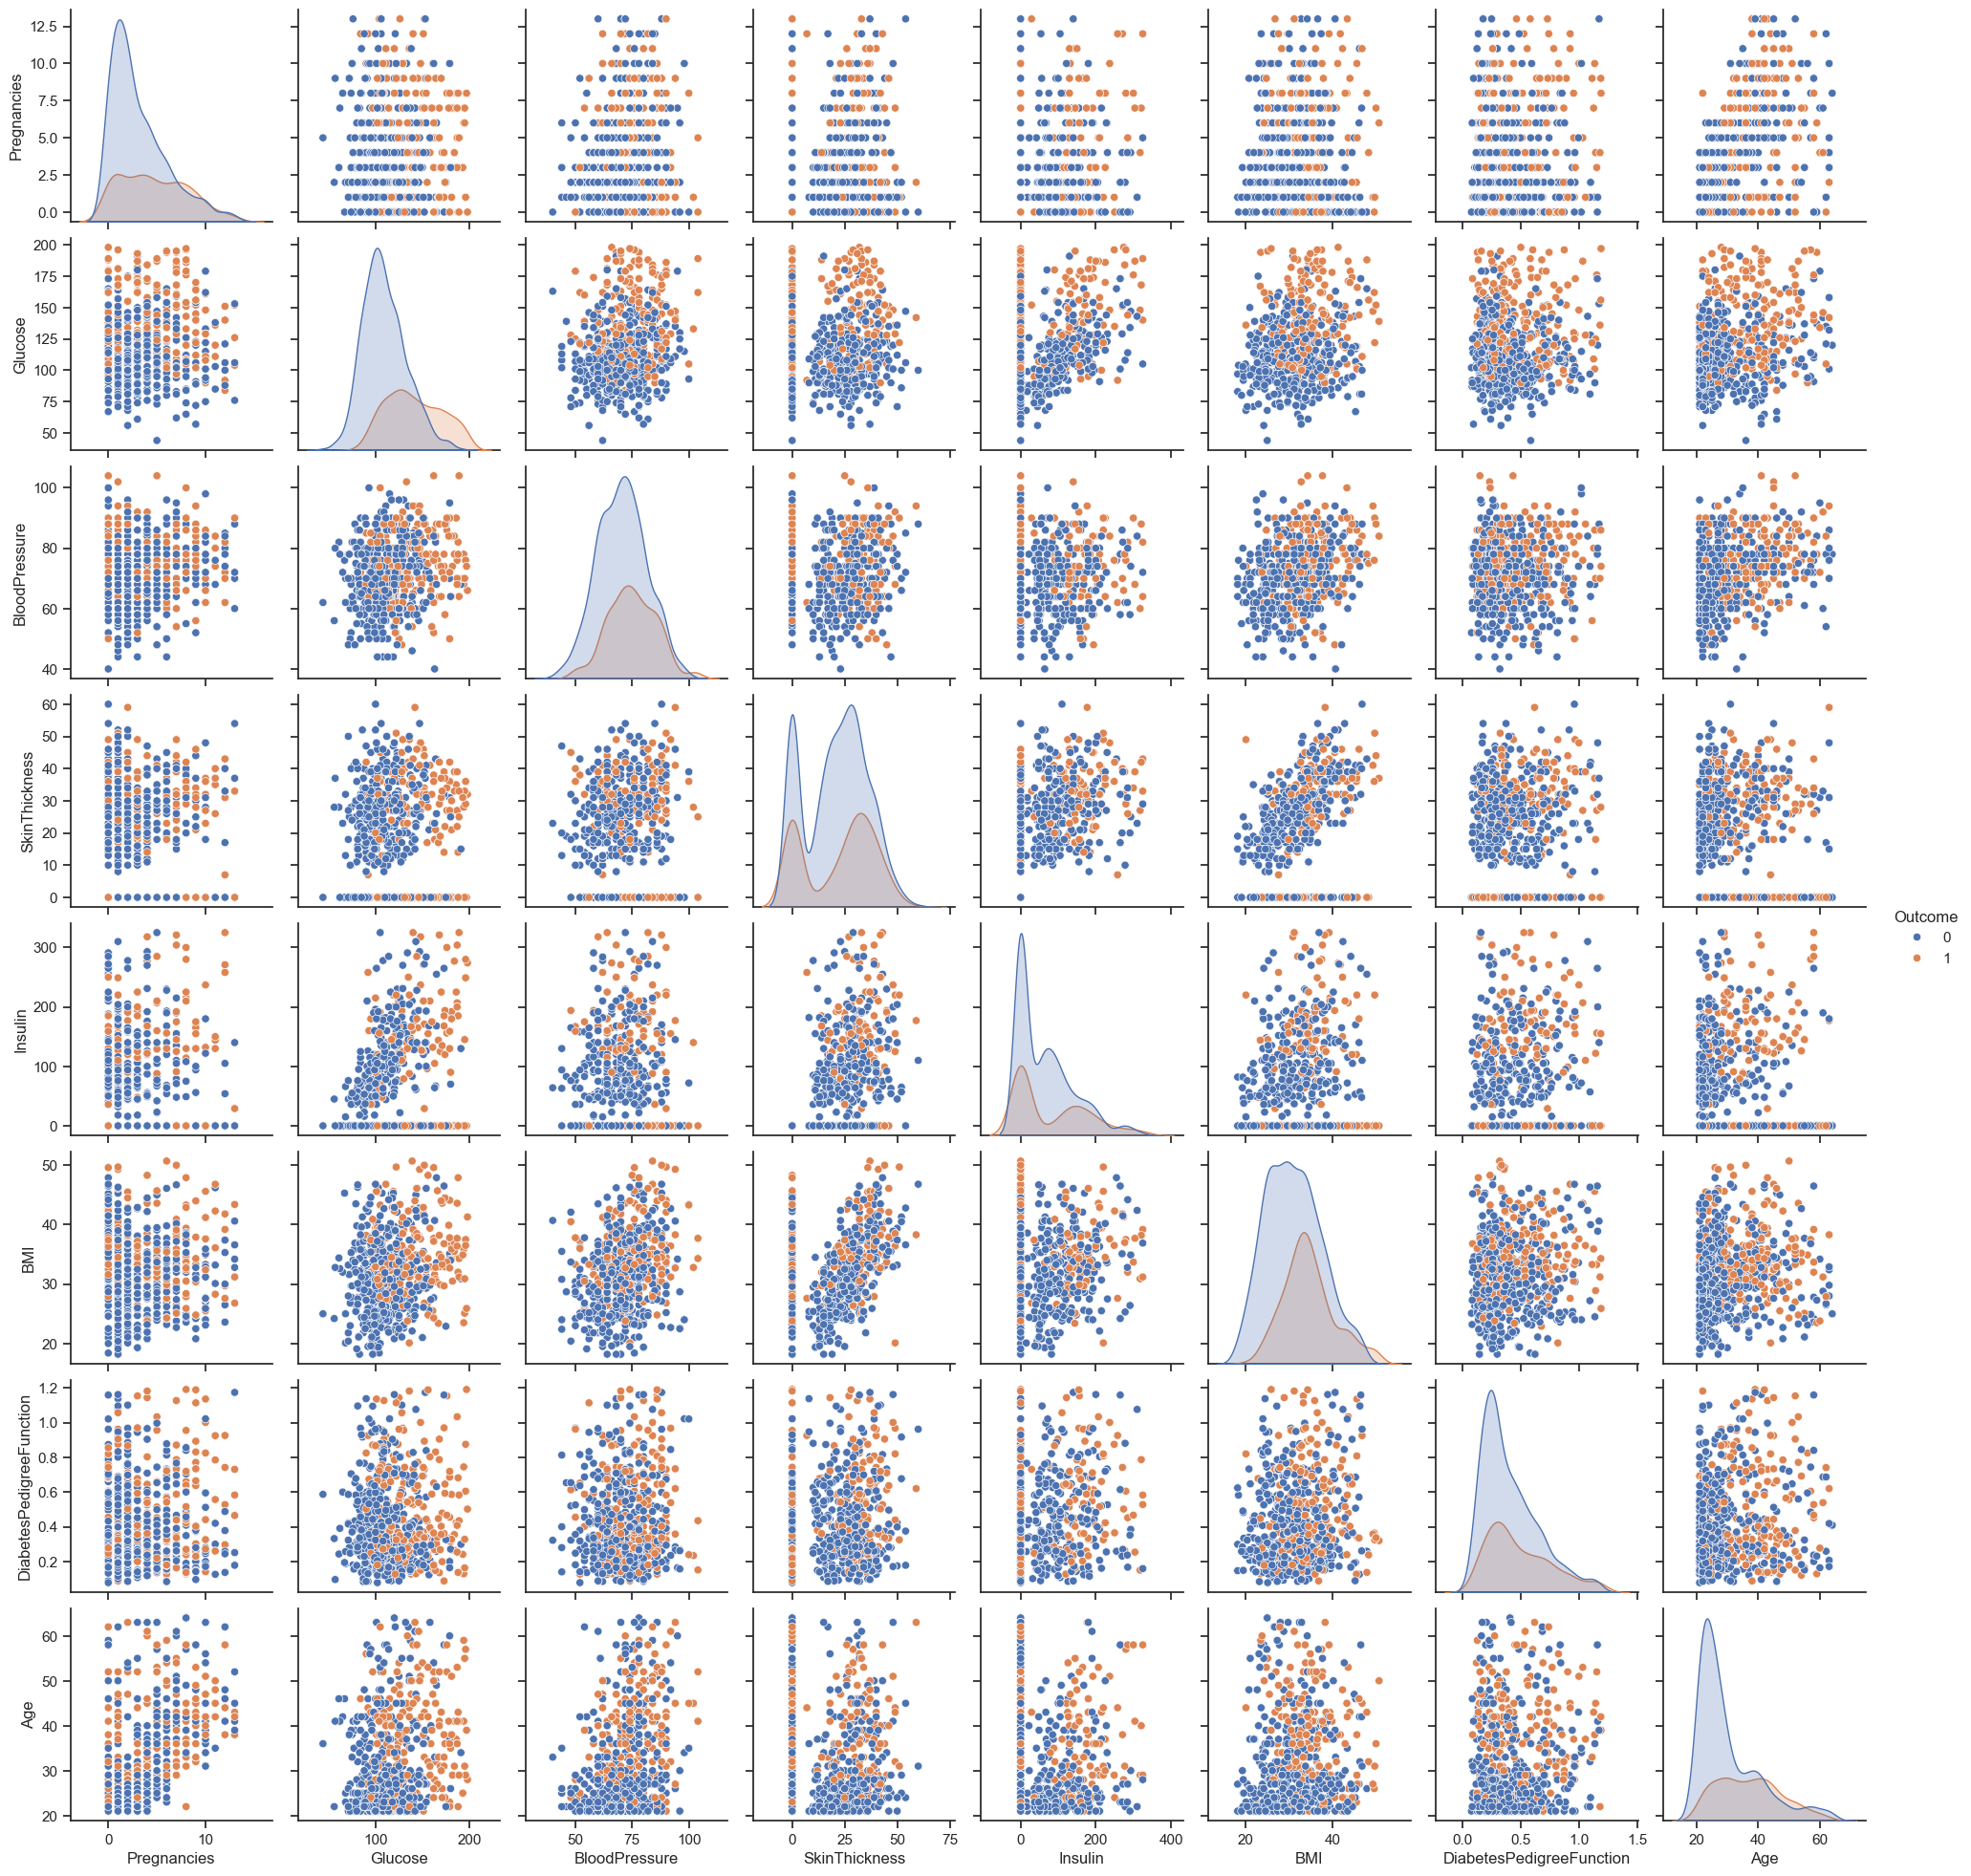

In [23]:
#Scatter matrix after removing outlier
sns.set(style="ticks")
sns.pairplot(df_out, hue="Outcome")
plt.show()

In [36]:
#lets extract features and targets
X=df_out.drop(columns=['Outcome'])
y=df_out['Outcome']

In [37]:
#Splitting train test data 80 20 ratio
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [38]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((1321, 8), (331, 8), (1321,), (331,))

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

#cross validation purpose
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])

In [40]:
#Lets build the model

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

acc=[]
roc=[]

clf=LogisticRegression()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.7854984894259819 ROC 0.7302328401649285


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

TP:  [18 13 20 23 25 20 24 26 23 18]
TN:  [81 85 84 86 81 85 83 87 82 86]
FN:  [23 28 20 17 15 20 16 14 17 22]
FP:  [11  6  8  6 11  7  9  5 10  6]


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [29]:
#Support Vector Machine
from sklearn.svm import SVC

clf=SVC(kernel='linear')
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.770392749244713 ROC 0.6999755381604696
TP:  [20 20 21 25 21 19 24 23 22 24]
TN:  [82 82 80 85 83 83 83 84 81 84]
FN:  [21 20 19 15 19 21 16 18 19 17]
FP:  [10 10 12  7  9  9  9  7 10  7]


In [35]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.824773413897281 ROC 0.7999633072407043
TP:  [30 27 33 30 27 26 27 27 33 30]
TN:  [82 85 86 82 87 77 83 84 86 80]
FN:  [11 14  8 11 13 14 13 13  7 10]
FP:  [10  6  5  9  5 15  9  8  6 12]


In [49]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(train_X,train_y)

y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.9848942598187311 ROC 0.9822338103322824
TP:  [40 37 36 38 37 38 38 39 36 35]
TN:  [92 91 91 90 90 90 89 91 90 91]
FN:  [1 4 4 2 3 2 2 1 4 5]
FP:  [0 0 1 2 2 2 3 1 2 1]


In [42]:
#Naive Bayes Theorem
#import library
from sklearn.naive_bayes import GaussianNB

clf=GaussianNB()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.770392749244713 ROC 0.7312030075187971
TP:  [23 20 22 24 29 21 30 27 26 18]
TN:  [76 80 80 79 74 73 83 79 70 83]
FN:  [18 21 18 16 11 19 10 13 14 22]
FP:  [16 11 12 13 18 19  9 13 22  9]


In [43]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators=50,learning_rate=0.2)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.8761329305135952 ROC 0.8347481607243916
TP:  [29 26 30 33 29 27 33 32 34 30]
TN:  [90 89 87 89 86 85 87 89 87 87]
FN:  [12 15 10  7 11 13  7  8  6 10]
FP:  [2 2 5 3 6 7 5 3 5 5]


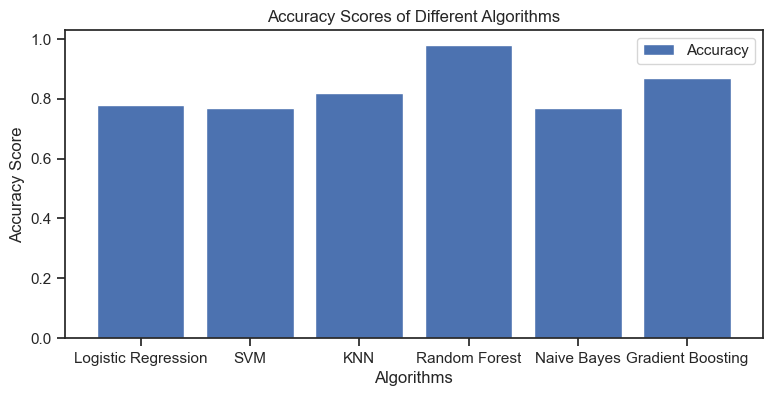

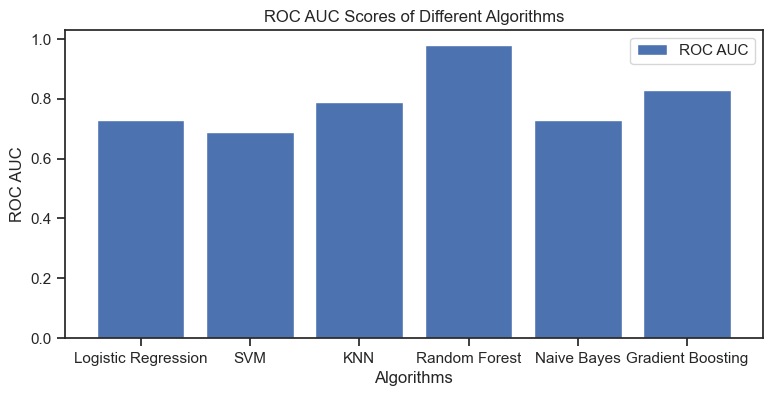

In [51]:
import matplotlib.pyplot as plt

# Sample accuracy and ROC AUC scores
acc = [0.78, 0.77, 0.82, 0.98, 0.77, 0.87]  # Replace with your actual accuracy scores
roc = [0.73, 0.69, 0.79, 0.98, 0.73, 0.83]  # Replace with your actual ROC AUC scores

algorithms = ['Logistic Regression', 'SVM', 'KNN', 'Random Forest', 'Naive Bayes', 'Gradient Boosting']

# Plot Accuracy Scores
plt.figure(figsize=(9, 4))
plt.bar(algorithms, acc, label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algorithms')
plt.title('Accuracy Scores of Different Algorithms')
plt.legend()
plt.show()

# Plot ROC AUC Scores
plt.figure(figsize=(9, 4))
plt.bar(algorithms, roc, label='ROC AUC')
plt.ylabel('ROC AUC')
plt.xlabel('Algorithms')
plt.title('ROC AUC Scores of Different Algorithms')
plt.legend()
plt.show()


In [ ]:
#Great....
#Random forest has highest accuracy 98% and ROC_AUC curve 97%
#model can be improve more if we take same count of labels
#in our model 30% is diabetic and 70% no diabetic patient

#model can be improve with fine tunning

In [53]:
import pickle
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load sample data
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the trained model as a pkl file
model_filename = 'random_forest_classifier.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {model_filename}")



Model saved to random_forest_classifier.pkl
